In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('healthcare_data.db')
cursor = conn.cursor()

In [3]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS patients_visits (
        id INTEGER PRIMARY KEY,
        patient_name TEXT,
        age INTEGER,
        gender TEXT,
        diagnosis TEXT,
        visit_date DATE,
        bill_amount REAL
    )
''')

In [4]:
data = [
    ('Asha Rao', 45, 'F', 'Hypertension', '2025-01-15', 1500.0),
    ('Rahul Mehta', 30, 'M', 'Diabetes', '2025-02-10', 1200.0),
    ('Priya Nair', 60, 'F', 'Heart Disease', '2025-03-05', 3000.0),
    ('Vivek Sharma', 50, 'M', 'Hypertension', '2025-01-22', 1600.0),
    ('Reena Gupta', 35, 'F', 'Flu', '2025-04-12', 800.0),
    ('Ajay Singh', 40, 'M', 'Diabetes', '2025-02-14', 1100.0)
]

In [5]:

cursor.executemany('''
    INSERT INTO patients_visits (patient_name, age, gender, diagnosis, visit_date, bill_amount)
    VALUES (?, ?, ?, ?, ?, ?)
''', data)

In [6]:
conn.commit()

In [7]:
query = '''
    SELECT diagnosis, COUNT(*) AS total_visits, SUM(bill_amount) AS total_billing
    FROM patients_visits
    GROUP BY diagnosis
'''
df = pd.read_sql_query(query, conn)
conn.close()

In [8]:
print("Healthcare Billing Summary:")
print(df)

Healthcare Billing Summary:
       diagnosis  total_visits  total_billing
0       Diabetes             2         2300.0
1            Flu             1          800.0
2  Heart Disease             1         3000.0
3   Hypertension             2         3100.0


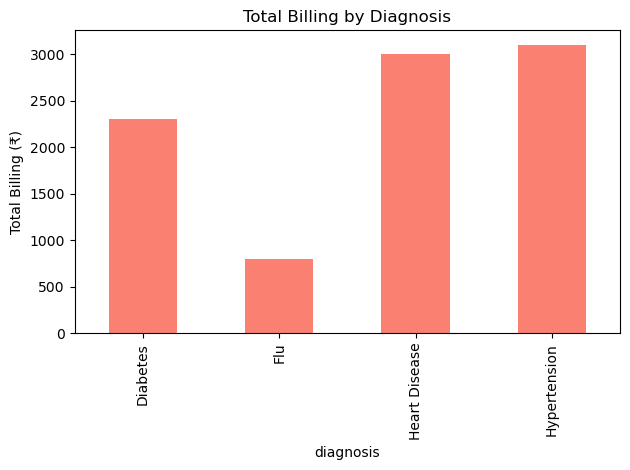

In [9]:
df.plot(kind='bar', x='diagnosis', y='total_billing', color='salmon', legend=False)
plt.title("Total Billing by Diagnosis")
plt.ylabel("Total Billing (₹)")
plt.tight_layout()
plt.savefig("healthcare_billing_chart.png")
plt.show()